Time 0.0s: Move +0.08s
Time 0.1s: Move +0.06s
Time 0.1s: Move +0.01s
Time 0.2s: Move -0.04s
Time 0.2s: Move -0.06s
Time 0.2s: Move -0.06s
Time 0.3s: Move -0.04s
Time 0.4s: Move +0.01s
Time 0.4s: Move +0.05s
Time 0.5s: Move +0.08s
Time 0.5s: Move +0.08s
Time 0.6s: Move +0.05s
Time 0.6s: Move +0.01s
Time 0.7s: Move -0.04s
Time 0.7s: Move -0.07s
Time 0.8s: Move -0.07s
Time 0.8s: Move -0.04s
Time 0.9s: Move +0.00s
Time 0.9s: Move +0.05s
Time 1.0s: Move +0.07s
Time 1.0s: Move +0.07s
Time 1.1s: Move +0.04s
Time 1.1s: Move -0.00s
Time 1.2s: Move -0.05s
Time 1.2s: Move -0.08s
Time 1.2s: Move -0.08s
Time 1.3s: Move -0.05s
Time 1.4s: Move -0.01s
Time 1.4s: Move +0.04s
Time 1.5s: Move +0.07s
Time 1.5s: Move +0.07s
Time 1.6s: Move +0.04s
Time 1.6s: Move -0.01s
Time 1.7s: Move -0.05s
Time 1.7s: Move -0.08s
Time 1.8s: Move -0.08s
Time 1.8s: Move -0.05s
Time 1.9s: Move -0.01s
Time 1.9s: Move +0.04s
Time 2.0s: Move +0.06s
Time 2.0s: Move +0.06s
Time 2.1s: Move +0.04s
Time 2.1s: Move -0.01s
Time 2.1s: 

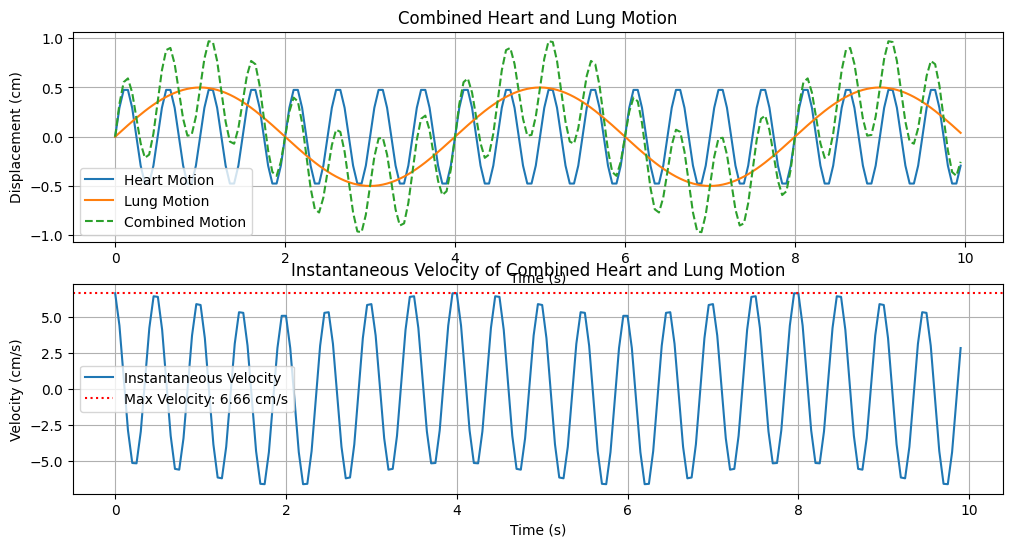

Maximum per-second travel speed required: 6.66 cm/s


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Heart parameters (2cm max peak-peak, 1cm avg)
heart_amplitude = 0.5
heart_frequency = 120 / 60

# Lung parameters (2cm max peak-peak, 1cm avg)
lung_amplitude = 0.5
lung_frequency = 15 / 60 

# Time array, 10s
t = np.arange(0, 10, 0.05)  # Time array with 0.1s resolution

# Heart and lung motion as sine waves
heart_motion = heart_amplitude * np.sin(2 * np.pi * heart_frequency * t)
lung_motion = lung_amplitude * np.sin(2 * np.pi * lung_frequency * t)

# Combined motion
combined_motion = heart_motion + lung_motion

# Motor parameters
motor_speed_cm_per_s = 4  # Motor speed in cm/s
dt = 0.05  # Time step in seconds

# Generate motor instructions
instructions = []
current_position = 0  # Initial position

for i in range(1, len(t)):
    displacement = combined_motion[i] - combined_motion[i - 1]
    time_needed = abs(displacement) / motor_speed_cm_per_s
    direction = '+' if displacement > 0 else '-'
    instructions.append(f"{direction}{time_needed:.2f}s")

# Print motor instructions
for i, instruction in enumerate(instructions):
    print(f"Time {t[i]:.1f}s: Move {instruction}")

# Visualization of motion waveforms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, heart_motion, label='Heart Motion')
plt.plot(t, lung_motion, label='Lung Motion')
plt.plot(t, combined_motion, label='Combined Motion', linestyle='--')
plt.title('Combined Heart and Lung Motion')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.legend()
plt.grid(True)

# Visualization of instantaneous velocity
velocity = np.diff(combined_motion) / dt
plt.subplot(2, 1, 2)
plt.plot(t[:-1], velocity, label='Instantaneous Velocity')
max_velocity = np.max(np.abs(velocity))
plt.axhline(max_velocity, color='r', linestyle=':', label=f'Max Velocity: {max_velocity:.2f} cm/s')
plt.title('Instantaneous Velocity of Combined Heart and Lung Motion')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')
plt.legend()
plt.grid(True)

plt.show()

print(f'Maximum per-second travel speed required: {max_velocity:.2f} cm/s')